<a href="https://colab.research.google.com/github/MuhammadHelmyOmar/Hadith/blob/main/bow_featuring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next

- Preprocessing
  - ~Removing punctuations, stop words, and diacritics~
- Visualize
  - ~box blots for Hadiths lengths~
- ~Increase Dataset size~


# Loading Data

In [1]:
import pandas as pd

In [2]:
data_url = 'https://raw.githubusercontent.com/KamelGaanoun/MHDetection/main/Corpus/trainFinal.csv'

data = pd.read_csv(data_url, index_col='Unnamed: 0')
print("CSV file loaded successfully!")
# Display the first few rows of the DataFrame
data.head()

CSV file loaded successfully!


,Matan,Degree
19036,لقد رأيتني وأنا ثلث الإسلام،‏.‏,0
17209,هريرة، أن أعرابيا، أتى النبي صلى الله عليه وس...,0
11245,عائشة، قالت كنت أفتل قلائد هدى رسول الله صلى ...,0
2827,قال النبي صلى الله عليه وسلم ‏ ‏ إني فرطكم على...,0
23616,عن النبي صلى الله عليه وسلم قال أقيموا الركوع ...,0


In [3]:
print(len(data))
print(data['Degree'].value_counts())

21248
Degree
0    19286
1     1962
Name: count, dtype: int64


In [4]:
# Filter data for each degree
data_degree_0 = data[data['Degree'] == 0]
data_degree_1 = data[data['Degree'] == 1]

# Sample 200 rows from each degree (if available)
# Use .sample(n, random_state) for reproducible sampling
sampled_degree_0 = data_degree_0.sample(n=min(1962, len(data_degree_0)), random_state=42)
sampled_degree_1 = data_degree_1.sample(n=min(1962, len(data_degree_1)), random_state=42)

# Concatenate the sampled dataframes
sampled_data = pd.concat([sampled_degree_0, sampled_degree_1])

# Display the value counts to verify the sampling
print("Value counts of the sampled data:")
display(sampled_data['Degree'].value_counts())

# Display the head of the sampled data
print("\nSampled data head:")
display(sampled_data.head())

Value counts of the sampled data:


,count
Degree,
0,1962
1,1962



Sampled data head:


,Matan,Degree
13645,أنها استعارت من أسماء قلادة فهلكت فأرسل النبي ...,0
16561,يقول كان رسول الله صلى الله عليه وسلم يأتي قبا...,0
13787,هريرة، أن رسول الله صلى الله عليه وسلم قال قلب...,0
4475,أبيه، أن النبي صلى الله عليه وسلم قال لا تزال ...,0
16463,القاسم صلى الله عليه وسلم تسموا باسمي ولا تكنو...,0


In [5]:
labels = sampled_data['Degree'].values
labels.shape

(3924,)

# Preprocessing

In [6]:
import re
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
arabic_stopwords = set(nltk.corpus.stopwords.words("arabic"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
def remove_diacritics(text):
  # remove diacritics
  text = text.replace(u"\u064B", "")  # fatHatayn
  text = text.replace(u"\u064C", "")  # Dammatayn
  text = text.replace(u"\u064D", "")  # kasratayn
  text = text.replace(u"\u064E", "")  # fatHa
  text = text.replace(u"\u064F", "")  # Damma
  text = text.replace(u"\u0650", "")  # kasra
  text = text.replace(u"\u0651", "")  # shaddah
  text = text.replace(u"\u0652", "")  # sukuun
  text = text.replace(u"\u0670", "`")  # dagger 'alif
  return text

In [8]:
sampled_data['Matan'] = sampled_data['Matan'].apply(lambda hadith: remove_diacritics(hadith))

In [9]:
sampled_data['text_length'] = sampled_data['Matan'].str.len()
sampled_data['stopwords_count'] = sampled_data['Matan'].apply(lambda hadith: len([word for word in hadith.split() if word in arabic_stopwords]))
sampled_data = sampled_data.sort_values(by='text_length',ascending=[0])
sampled_data.head()

,Matan,Degree,text_length,stopwords_count
1427,لما أسري بي إلى السماء رأيت فيها أعاجيب من ع...,1,29527,1629
4106,أن جبريل عليه السلام أتى النبي صلى الله عليه...,1,9507,440
3738,زيارة إبليس اللعين للنبي صلى الله عليه وسلم...,1,9363,474
10718,أنس بن مالك رضي الله عنه قال: ((جاء جبريل إ...,1,8711,438
22047,((روي عن النبي صلى الله عليه وآله وسلم أنه ق...,1,7504,471


In [10]:
# Create a CountVectorizer Object
vectorizer = CountVectorizer(stop_words=list(arabic_stopwords), min_df=0.003, max_df=0.3)

# Fit and transform the corpus
bow = vectorizer.fit_transform(sampled_data['Matan'])

# Print the length of the generated vocabulary
print("Vocabulary Size:", len(vectorizer.get_feature_names_out()))

# Print the Bag-of-Words matrix
print("BoW Representation:")
print(bow.toarray())
print(bow.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


Vocabulary Size: 960
BoW Representation:
[[2 3 0 ... 3 0 0]
 [1 0 1 ... 5 0 1]
 [1 4 0 ... 9 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(3924, 960)


# Exploratory Text Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

## Top N words

In [12]:
# Get feature names (words)
words = vectorizer.get_feature_names_out()

# Sum up the occurrences of each word across all documents
counts = bow.sum(axis=0).A1

# Create a dictionary of word counts
word_counts = dict(zip(words, counts))

# Sort the dictionary by frequency in descending order
word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

In [13]:
# Get the list of top N words from the previous analysis
top_n = 20
print(f"Top {top_n} most frequent words:")
top_words = list(word_counts.keys())[:top_n]

# Filter data by degree
data_degree_0 = sampled_data[sampled_data['Degree'] == 0]['Matan']
data_degree_1 = sampled_data[sampled_data['Degree'] == 1]['Matan']

# Create CountVectorizer objects for each degree, using the vocabulary of the top words
vectorizer_degree_0 = CountVectorizer(vocabulary=top_words)
vectorizer_degree_1 = CountVectorizer(vocabulary=top_words)

# Transform the data for each degree
bow_degree_0 = vectorizer_degree_0.fit_transform(data_degree_0)
bow_degree_1 = vectorizer_degree_1.fit_transform(data_degree_1)

# Sum the occurrences of each top word in each degree
word_counts_degree_0 = bow_degree_0.sum(axis=0).A1
word_counts_degree_1 = bow_degree_1.sum(axis=0).A1

# Create dictionaries of word counts for each degree
word_counts_0_dict = dict(zip(top_words, word_counts_degree_0))
word_counts_1_dict = dict(zip(top_words, word_counts_degree_1))

# Create a DataFrame to compare the counts
comparison_df = pd.DataFrame({
    'Degree_0_Count': word_counts_0_dict,
    'Degree_1_Count': word_counts_1_dict
})

# Calculate the total count for each word across both degrees
comparison_df['Total Count'] = comparison_df['Degree_0_Count'] + comparison_df['Degree_1_Count']

# Display the comparison table, sorted by total count
display(comparison_df.sort_values(by='Total Count', ascending=False))

Top 20 most frequent words:


,Degree_0_Count,Degree_1_Count,Total Count
فقال,991,596,1587
النبي,933,288,1221
بن,562,213,775
يوم,166,362,528
الجنة,87,337,424
يقول,273,119,392
أبي,239,126,365
الناس,181,178,359
محمد,79,256,335
ابن,246,72,318


## Comparing lengths

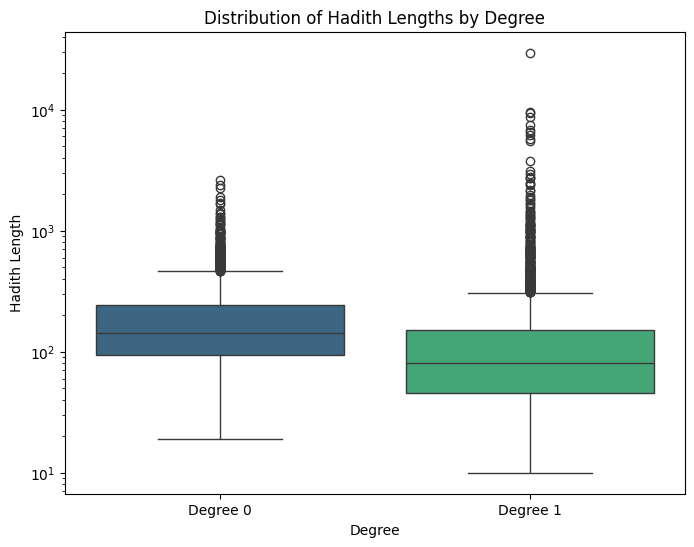

In [14]:
# Create box plots for Hadith lengths by degree
plt.figure(figsize=(8, 6))
sns.boxplot(x='Degree', y='text_length', data=sampled_data, hue='Degree', palette='viridis', legend=False)
plt.title('Distribution of Hadith Lengths by Degree')
plt.xlabel('Degree')
plt.ylabel('Hadith Length')
plt.xticks([0, 1], ['Degree 0', 'Degree 1'])
plt.yscale('log') # Scaled the y-axis logarithmically
plt.show()

In [15]:
# Calculate percentiles for text length by degree
percentiles = sampled_data.groupby('Degree')['text_length'].quantile([0.25, 0.5, 0.75])

print("Percentiles of Hadith Length by Degree:")
display(percentiles)

Percentiles of Hadith Length by Degree:


Degree      
0       0.25     94.00
        0.50    144.00
        0.75    241.75
1       0.25     46.00
        0.50     80.00
        0.75    151.00
Name: text_length, dtype: float64

In [16]:
# Calculate IQR for each degree
Q1 = sampled_data.groupby('Degree')['text_length'].quantile(0.25)
Q3 = sampled_data.groupby('Degree')['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
upper_bound = Q3 + 1.5 * IQR

print("\nUpper bounds for outliers:")
display(upper_bound)

# Identify outliers for each degree
outliers_degree_0 = sampled_data[(sampled_data['Degree'] == 0) &
                                (sampled_data['text_length'] > upper_bound[0])]

outliers_degree_1 = sampled_data[(sampled_data['Degree'] == 1) &
                                (sampled_data['text_length'] > upper_bound[1])]


# Print the number of outliers
print(f"Number of outliers for Degree 0 above upper bound: {len(outliers_degree_0)}")
print(f"Number of outliers for Degree 1 above upper bound: {len(outliers_degree_1)}")


Upper bounds for outliers:


,text_length
Degree,
0,463.375
1,308.500


Number of outliers for Degree 0 above upper bound: 146
Number of outliers for Degree 1 above upper bound: 227


# Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(bow, labels, test_size=0.2,random_state=109)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3139, 960), (785, 960), (3139,), (785,))

# SVM Classifier

## Modeling

In [43]:
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

In [44]:
clf = LinearSVC(random_state=109)
clf.fit(X_train, y_train)

LinearSVC(random_state=109)

## Evaluation

In [45]:
from sklearn import metrics

In [46]:
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8394904458598726
Precision: 0.8047619047619048
Recall: 0.8848167539267016
F1 Score: 0.8428927680798005


In [47]:
coefficients = list(clf.coef_[0])
words = list(vectorizer.get_feature_names_out())
maximas = {}
minimas = {}

for i in range(100):
  max_value = max(coefficients)
  min_value = min(coefficients)

  mx = coefficients.index(max_value)
  maximas[words[mx]] = max_value
  coefficients.pop(mx)
  words.pop(mx)

  mn = coefficients.index(min_value)
  minimas[words[mn]] = min_value
  coefficients.pop(mn)

In [59]:
minimas.keys()

dict_keys(['أمتي', 'زوجها', 'بقي', 'فقلنا', 'النهار', 'النظر', 'عام', 'أصحاب', 'سائر', 'بعث', 'مثلها', 'الحجر', 'حساب', 'قدم', 'مالك', 'قوما', 'فتنة', 'الليل', 'السلام', 'نسائه', 'الأنبياء', 'هريرة', 'الأحد', 'وعلى', 'العصر', 'غلام', 'فقلت', 'الأمة', 'وكذا', 'بعدي', 'فذكرت', 'وأما', 'جلس', 'منا', 'بمعنى', 'الإيمان', 'وهي', 'يحدث', 'روح', 'نفسها', 'صلاته', 'وعزتي', 'ليلة', 'قلبه', 'نام', 'الكرسي', 'لكل', 'فاطمة', 'فإنه', 'الثوب', 'يديه', 'كتب', 'كانوا', 'الحجة', 'الأخرى', 'صل', 'وجه', 'لعلي', 'فهو', 'صيام', 'خرجنا', 'فاقتلوه', 'مولى', 'رضي', 'شئت', 'وعشرين', 'فسألته', 'مرات', 'رفع', 'العلماء', 'جارية', 'جبل', 'شك', 'رجل', 'المحرم', 'عائشة', 'وقف', 'قريش', 'الأعمش', 'أنزل', 'غزوة', 'خطب', 'العزيز', 'ونحن', 'فأرسل', 'وإلا', 'يصوم', 'ومعه', 'أمر', 'أصحابي', 'الرابعة', 'قالوا'])

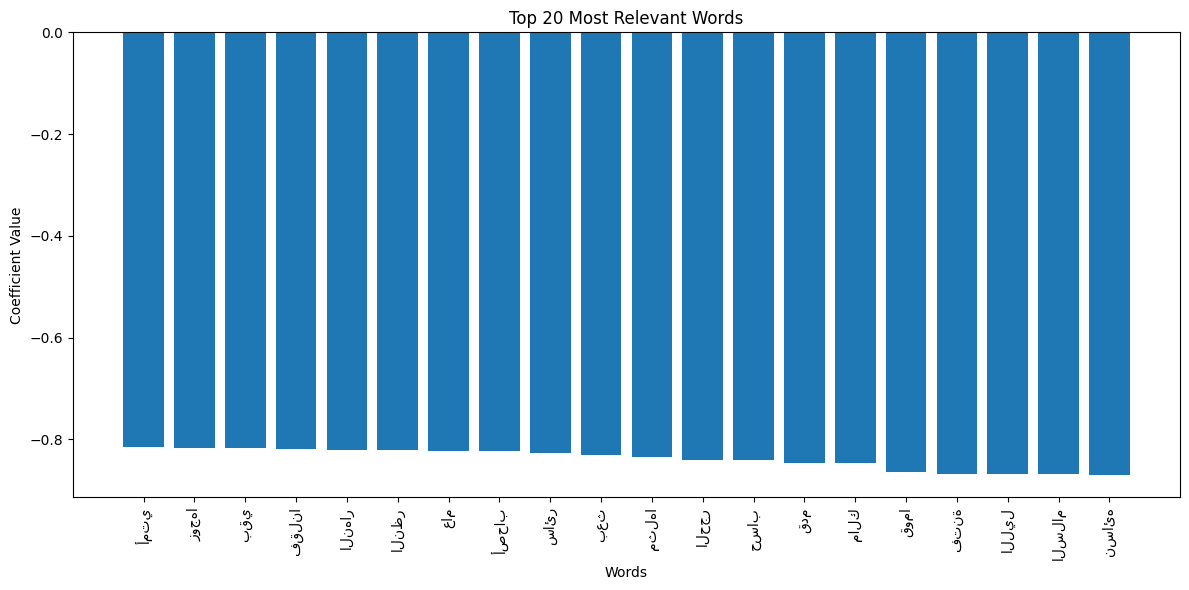

In [55]:
# Plot the coefficients for minimas
minimas = dict(sorted(minimas.items(), key=lambda item: abs(item[1]), reverse=False))

plt.figure(figsize=(12, 6))
plt.bar(list(minimas.keys())[:20], list(minimas.values())[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Most Relevant Words')
plt.xlabel('Words')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

In [60]:
maximas.keys()

dict_keys(['حب', 'فيقال', 'مكتوب', 'ينظر', 'الطعام', 'بنى', 'يبعث', 'يقول', 'ليلا', 'يدى', 'يقل', 'عباس', 'واحدة', 'أردت', 'موسى', 'وأن', 'نحوه', 'الصلاة', 'بالليل', 'فأنزل', 'أرسل', 'صام', 'قلت', 'عائشة', 'ربكم', 'وذلك', 'اليسرى', 'يبقى', 'فإني', 'وأنت', 'أحسن', 'ماء', 'والناس', 'وزاد', 'حبيبي', 'الراحمين', 'أخاه', 'ورفع', 'نهى', 'شهرا', 'الحق', 'حسن', 'بعضهم', 'أحببت', 'الماء', 'فأتى', 'الزهري', 'بفاتحة', 'حسنة', 'تعالى', 'الصبح', 'قتادة', 'مولود', 'اليوم', 'وأنا', 'وقال', 'مكة', 'العباس', 'حدثني', 'وضوء', 'بيده', 'تأكل', 'الشام', 'صل', 'ولم', 'العذاب', 'المهاجرين', 'حق', 'ابنة', 'الإنسان', 'غفر', 'حرام', 'خيرا', 'جابر', 'القرآن', 'صدقة', 'دين', 'سورة', 'صائم', 'سهل', 'حوراء', 'آل', 'الحكم', 'إني', 'والملائكة', 'إسرائيل', 'رأسه', 'جارية', 'مرتين', 'دخلت', 'مرات', 'فلانا', 'مسلم', 'ذنب', 'بال', 'فسألته', 'سفيان', 'فأتيت', 'واليوم', 'فجعلت'])

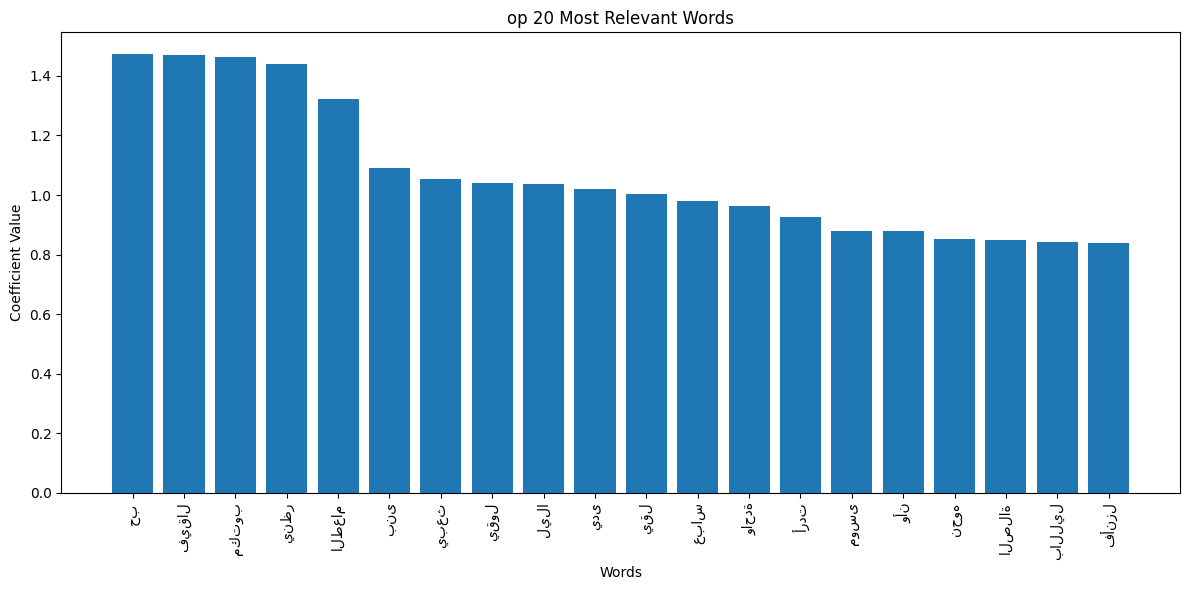

In [57]:
# Plot the coefficients for maximas
maximas = dict(sorted(maximas.items(), key=lambda item: abs(item[1]), reverse=True))

plt.figure(figsize=(12, 6))
plt.bar(list(maximas.keys())[:20], list(maximas.values())[:20])
plt.xticks(rotation=90)
plt.title('op 20 Most Relevant Words')
plt.xlabel('Words')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Lasso Regression Model

In [21]:
from sklearn.linear_model import Lasso


Fitting Lasso model with alpha = 0.01


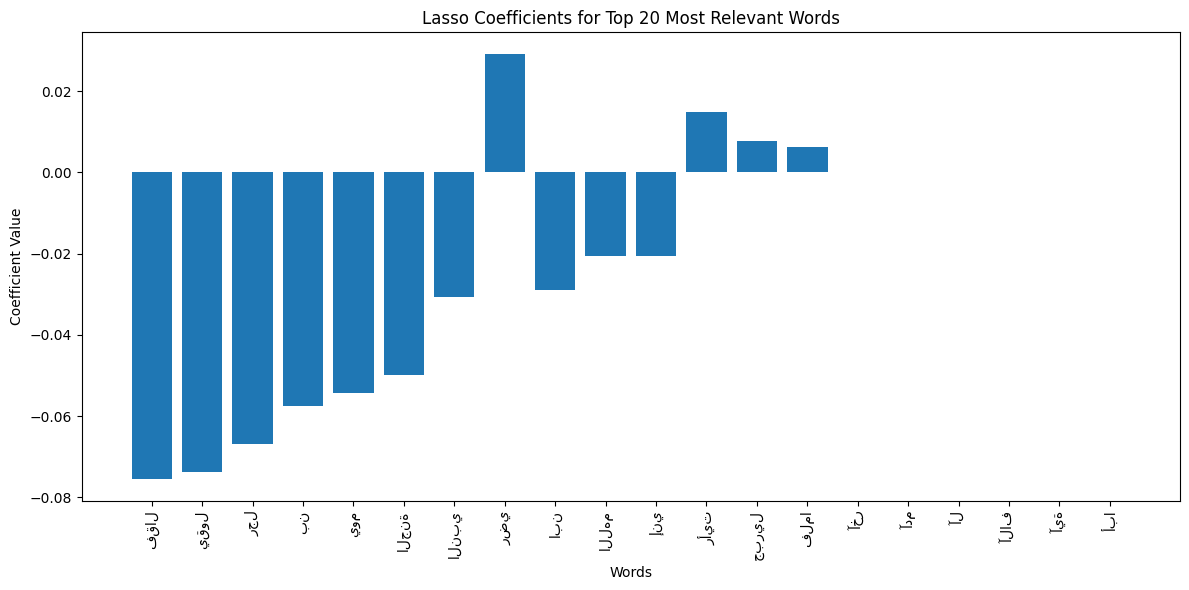


Fitting Lasso model with alpha = 0.005


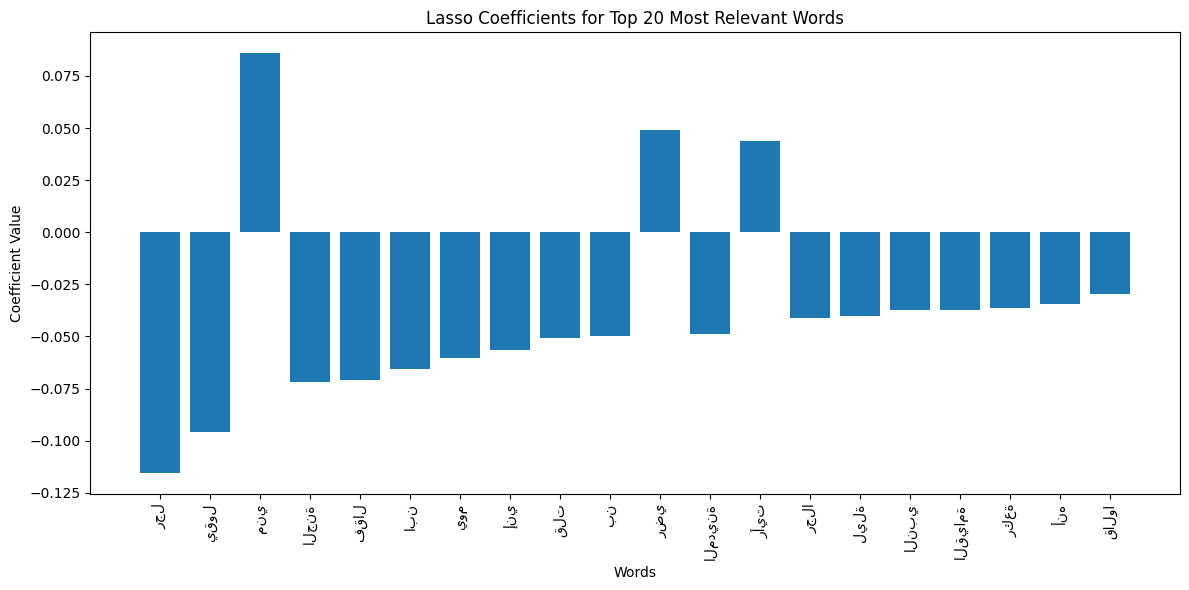


Fitting Lasso model with alpha = 0.001


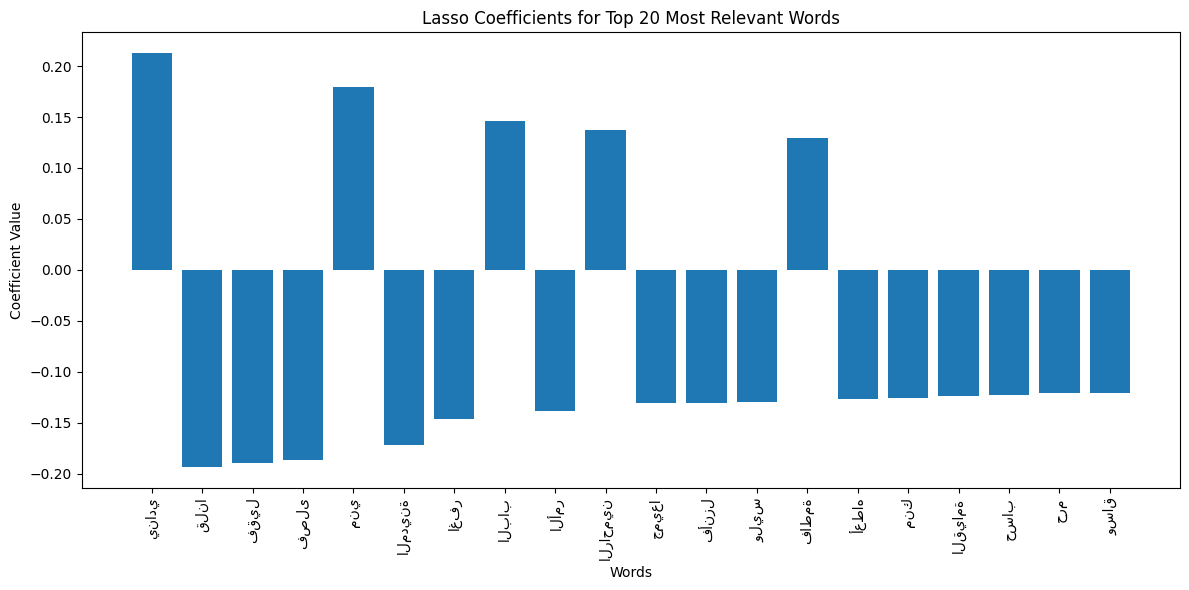

In [41]:
# Try different alpha values and observe the coefficients
alpha_values = [0.01, 0.005, 0.001]
words = vectorizer.get_feature_names_out()

for alpha in alpha_values:
    print(f"\nFitting Lasso model with alpha = {alpha}")
    lasso_model = Lasso(alpha=alpha, random_state=109)
    lasso_model.fit(X_train, y_train)
    lasso_coefficients = lasso_model.coef_
    word_coefficients = dict(zip(words, lasso_coefficients))
    word_coefficients = dict(sorted(word_coefficients.items(), key=lambda item: abs(item[1]), reverse=True))

    # Plot the coefficients
    plt.figure(figsize=(12, 6))
    plt.bar(list(word_coefficients.keys())[:20], list(word_coefficients.values())[:20])
    plt.xticks(rotation=90)
    plt.title('Lasso Coefficients for Top 20 Most Relevant Words')
    plt.xlabel('Words')
    plt.ylabel('Coefficient Value')
    plt.tight_layout()
    plt.show()

# Gemi